# HR Analytics Project- Understanding the Attrition in HR

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processe

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import joblib
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df=pd.read_csv('dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')
pd.pandas.set_option('display.max_columns',None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [3]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [4]:
#Lets check the  shape of the dataset
df.shape

(1470, 35)

The dataset contains 1470 records and 35 features, where Attrition is the output feature

In [5]:
#checking the  information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Information of the dataset this tells about that Total 35 data Columns are present and 1470 entries are given

In [6]:
#Lets check the  Datatypes of each column
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Here 9 features are 9 are object datatype and remaining 26 are integer datatype

In [7]:
#lets chcekk the null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

here we can see in above dataset there are no null values

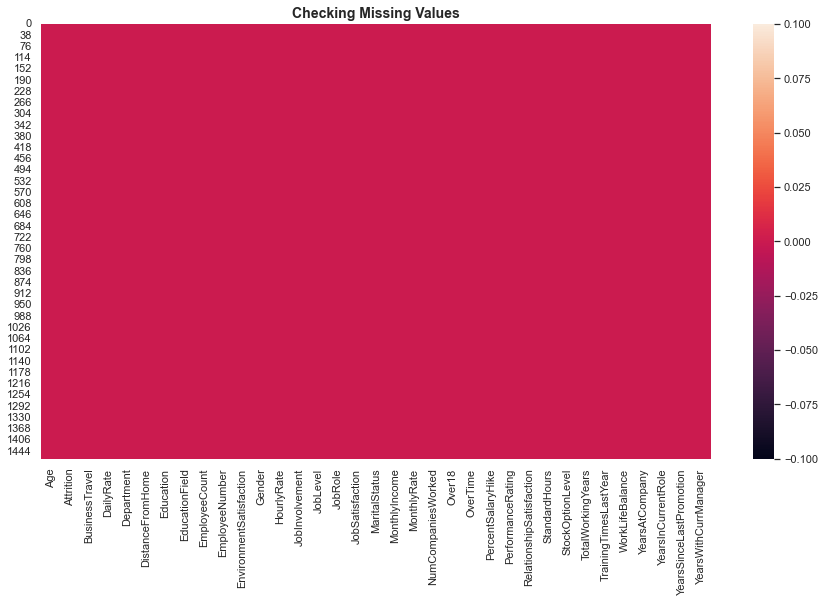

In [8]:
#Lets check this by heatmap
plt.figure(figsize=(15,8))
sns.set(style='whitegrid')
sns.heatmap(df.isnull())
plt.title('Checking Missing Values',fontsize=14,fontweight='bold')
plt.show()

No null values present

In [9]:
#there is  column employe number in the dataset that we can drop as it does not helps so we drop
df.drop(columns=["EmployeeNumber"],inplace=True)

this columnn has only one value throughout the dataset so it will not help us in any way so lets drop

In [10]:
#lets see over18 column
df["Over18"].unique()

array(['Y'], dtype=object)

this columnn has only one value throughout the dataset so it will not help us in any way so lets drop

In [11]:
df.drop(columns=["Over18"],inplace=True)

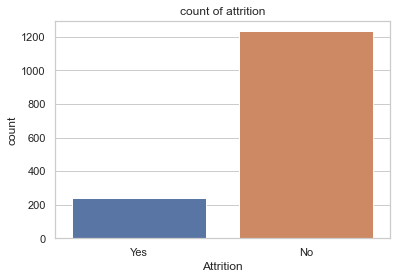

In [12]:
#Lets check the count of attrition
sns.set(style="whitegrid")
sns.countplot(x="Attrition",data=df)
plt.title('count of attrition')
plt.xlabel('Attrition')
plt.ylabel('count')
plt.show()

so this is a higly imbalanced dataset,here out of every 7 employee 1 is facing attrition

## Visualizing the numerical columns

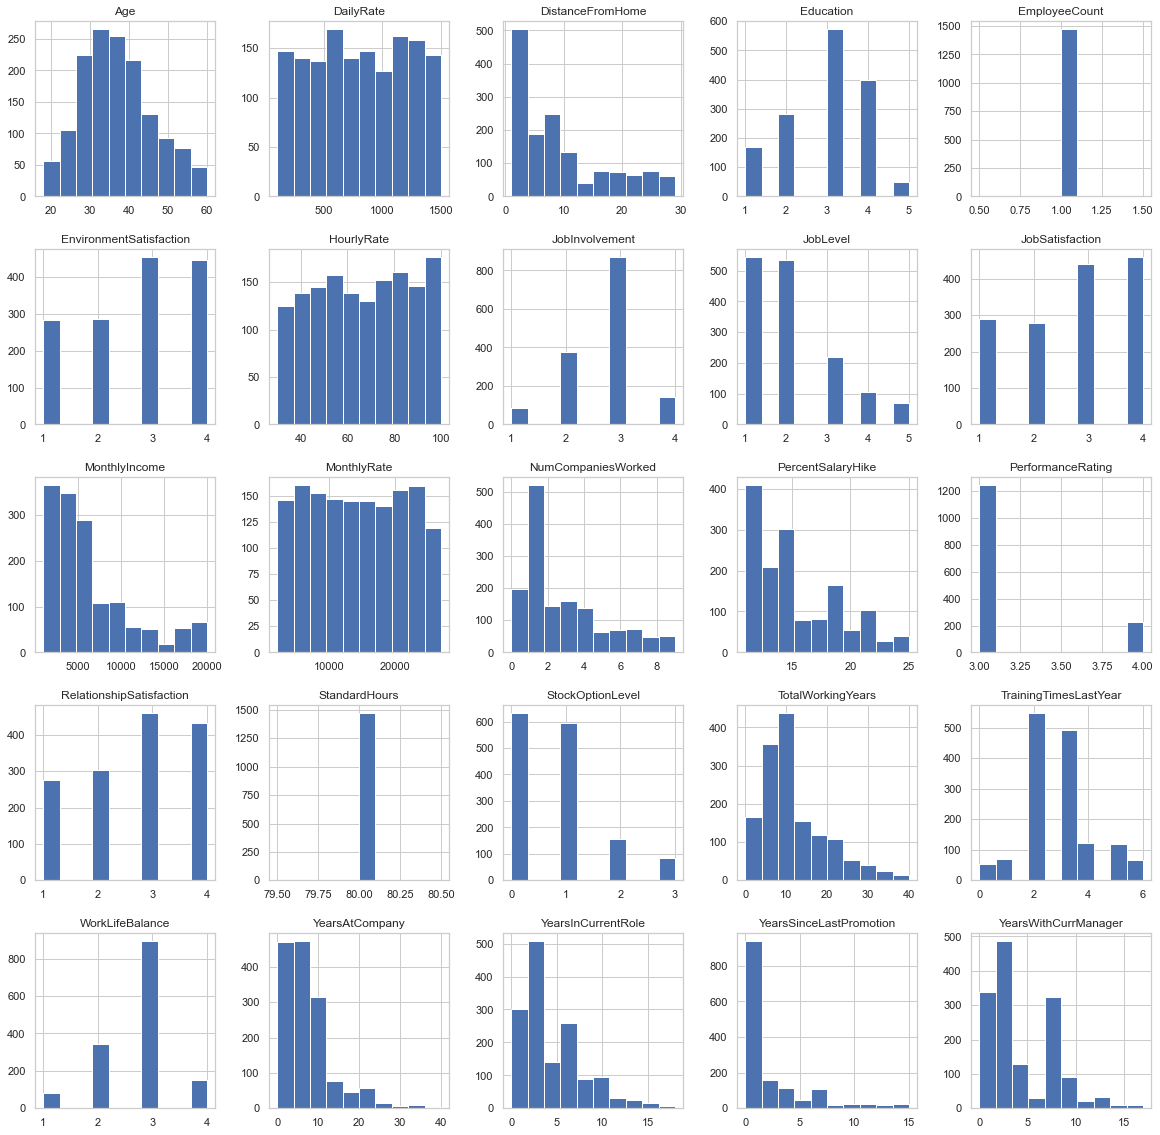

In [13]:
df.hist(figsize = (20,20))
plt.show()

As you see above there are continuous and discrete variables.

Countinuous variables-->Age,dailyRate,yearswithcurrmanager,Yearsatcompany,yearsinCurrentRole,YearsSinceLastPromotion and soon.

Descrete variable-->Education,Employeecount,Jobsatisfaction,Performancerating,Stockoptionlevel and soon

## Visualizing categorical columns

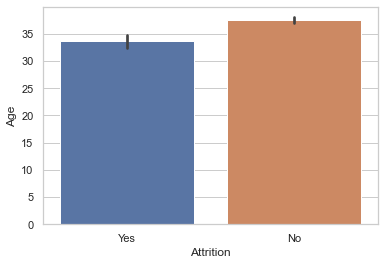

In [14]:
#Lets see average age of employees who is leaving to that who are staying
sns.barplot(x="Attrition",y="Age",data=df)
plt.show()

here graph shows that people who are staying has age more

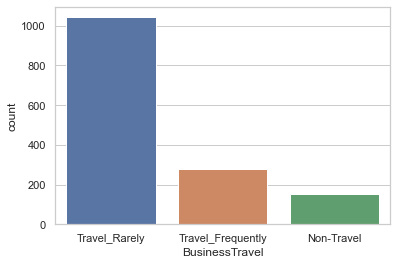

In [15]:
#Lets check the count of employees based on buisness travel
sns.countplot(x="BusinessTravel",data=df)
plt.show()

most of the employee travel rarely

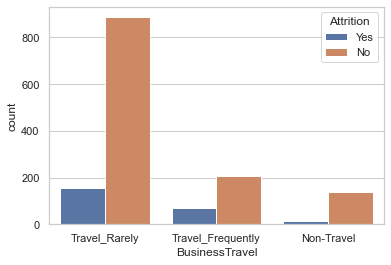

In [16]:
#Lets see the count of each category of buisness travel where employee attrition is true
sns.countplot(x="BusinessTravel",data=df,hue="Attrition")
plt.show()

based on the graph it can be concluded that proportion of attrition is higher where travel is frequent

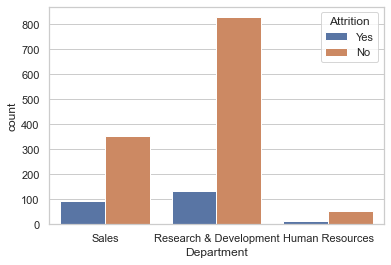

In [17]:
#lets check in which department attrintion is high
sns.countplot(x="Department",data=df,hue="Attrition")
plt.show()

From department,Employees from research and development has more attrition,Human resourses have found very less attriction.

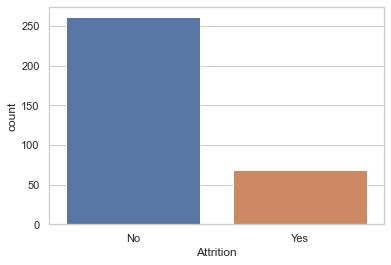

In [18]:
#lets chcek when distance from home is above 15 kms whats the attrition
sns.countplot(x="Attrition",data=df.loc[df["DistanceFromHome"]>15])
plt.show()

Less no. of attrition is there for employee whose distance from home is above 15 kms

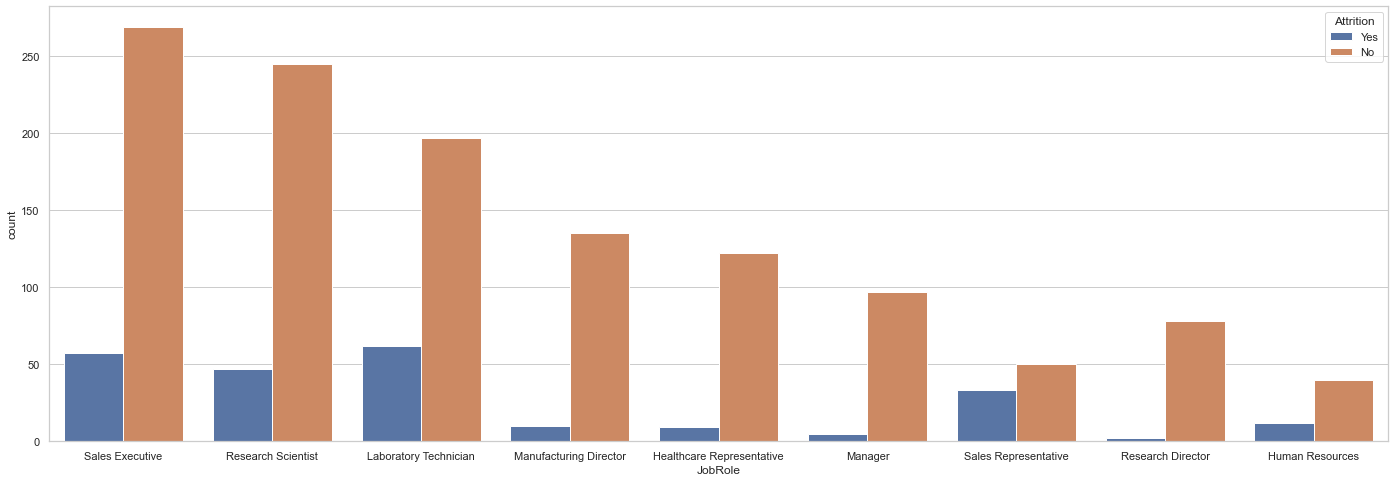

In [19]:
#Lets chcek the attrition in each job role
plt.figure(figsize=(24,8))
sns.countplot(x="JobRole",data=df,hue="Attrition")
plt.show()

From roles of employeee,it is found that employees who are salesexecutive and research scientist have more attrition rate.

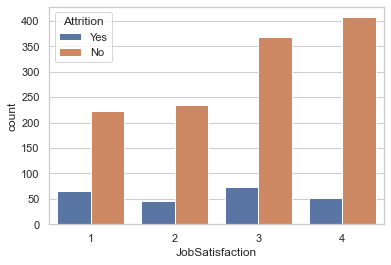

In [20]:
#lets chcek the attrition ratio based on job satisfaction
sns.countplot(x="JobSatisfaction",data=df,hue="Attrition")
plt.show()

here we are able to see that as job satisfaction increases proportion of a leavers decrease

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

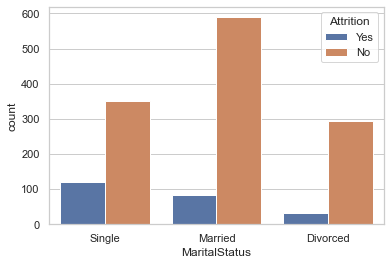

In [21]:
sns.countplot(x='MaritalStatus',hue='Attrition',data=df)

From MaritalStatus,we can see that single and married have more attrition than divorced.

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

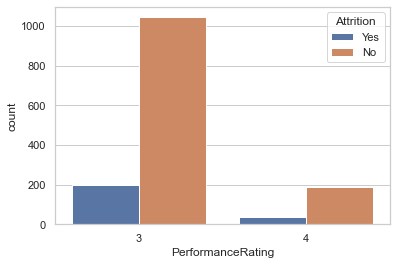

In [22]:
df['PerformanceRating'].value_counts()
sns.countplot(x='PerformanceRating',hue='Attrition',data=df)

Employees having performance rating of 3 have more attrition rate.

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

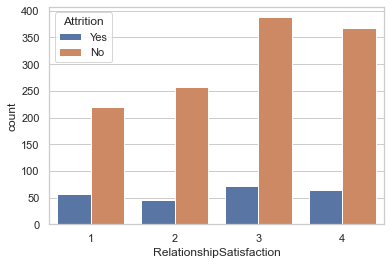

In [23]:
sns.countplot(x='RelationshipSatisfaction',hue='Attrition',data=df)

Employees having relationship satisfaction high or very high have good attrition rate.

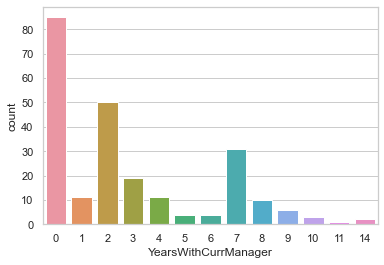

In [24]:
sns.countplot(x="YearsWithCurrManager",data=df.loc[df["Attrition"]=="Yes"])
plt.show()

here we came to know that if years working wth current manager is 0 then attrition was very high

Also after 2 years of working significant amount of people left

so it can be new project they moved to they didn't like job role or something else.

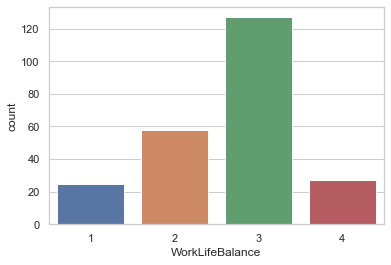

In [25]:
#lets check the work life balance with attrition
sns.countplot(x="WorkLifeBalance",data=df.loc[df["Attrition"]=="Yes"])
plt.show()

Here we can see that Work life balance of 3 have very high Attrition

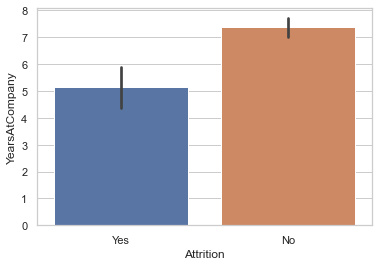

In [26]:
# average working years of the employee who left and who stayed
sns.barplot(x="Attrition",y="YearsAtCompany",data=df)
plt.show()

so here we get what is the average number of years employee is staying in the company before leaving, Almost after 6 years employee levae the company

In [27]:
#Lets check the time laped since  last promotion
df.loc[df["Attrition"]=="Yes"].groupby(["YearsSinceLastPromotion"]).agg({"Attrition":"count"})

,Attrition
YearsSinceLastPromotion,
0,110
1,49
2,27
3,9
4,5
5,2
6,6
7,16
9,4


here majority almost half of people left not even single year passed since last promotion.

we can conclude promotion is not the factor why people left the company

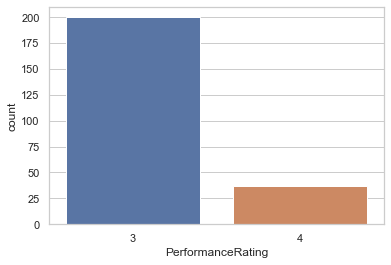

In [28]:
#Now lets check how performnce rating is afecting attrition level
sns.countplot(x="PerformanceRating",data=df.loc[df["Attrition"]=="Yes"])
plt.show()

may be since they expect that their work deserves more rating and is undervalued.

almost all the people who left were who got rating 3

In [29]:
df["EmployeeCount"].unique()

array([1], dtype=int64)

Here we see that EmployeeCount is having same vaue in entire dataset

In [30]:
df["StandardHours"].unique()

array([80], dtype=int64)

Here we see that StandardHours has same value throughout

Lets drop StandardHours & EmployeeCount as it will not proovide any information

In [31]:
df.drop(columns=["StandardHours","EmployeeCount"],inplace=True)

## Checking the correlation

In [32]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,0.034814,0.149515,-0.027269,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


Here it is very hard to see the correlation among columns, lets represnt this with the help of heatmap for better understanding

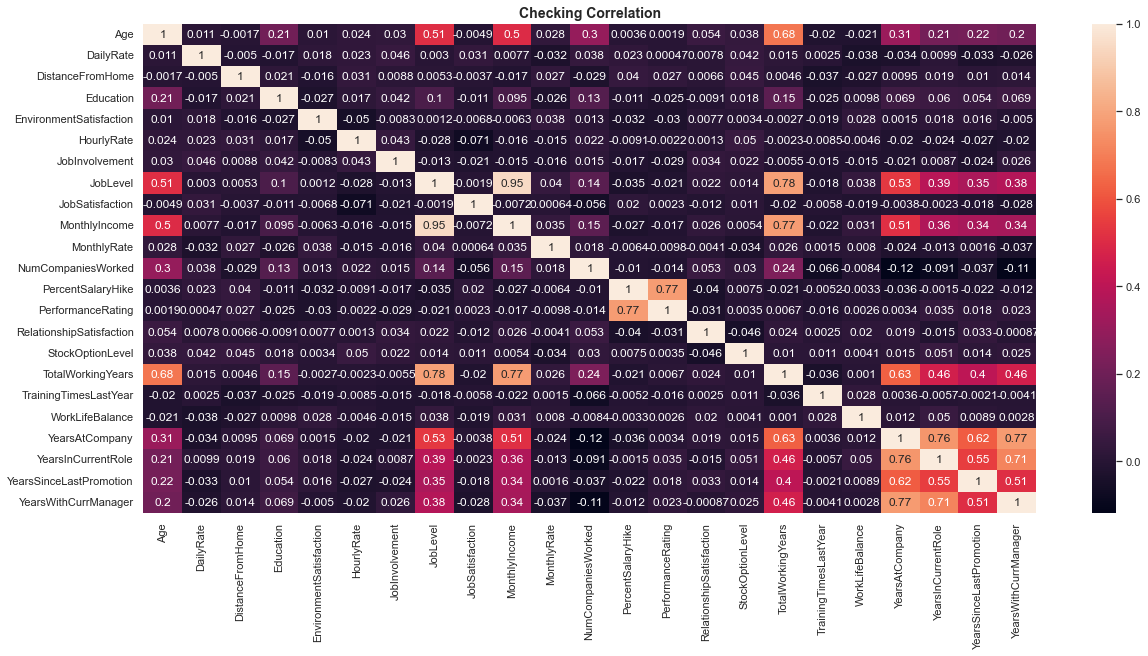

In [33]:
plt.figure(figsize=(20,9))
sns.heatmap(df.corr(),annot=True)
plt.title('Checking Correlation',fontsize=14,fontweight='bold')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='JobLevel'>

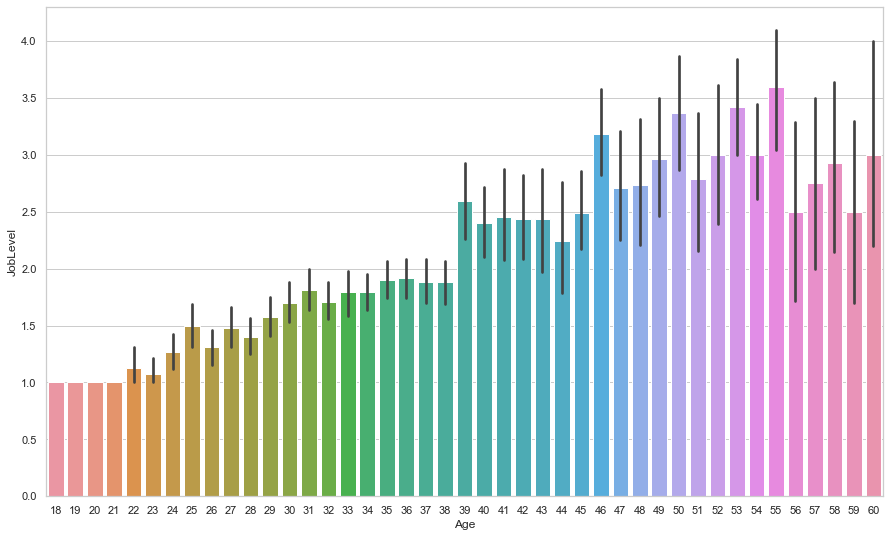

In [34]:
plt.figure(figsize=(15,9))
sns.barplot(df['Age'],df['JobLevel'])

here we can see that with age the Joblevel of the employee increases.

In [35]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [36]:
#lets chcek the skewness in the dataset
print(df.skew())
print("Total count of numeric features: ",len(df.skew()))
print("count of features which are significantly skewed: ",len(df.skew().loc[abs(df.skew())>0.5]))

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64
Total count of numeric features:  23
count of features which are significantly skewed:  14


In [37]:
#lets separate the input and output column
df_x=df.drop(columns=["Attrition"])
y=df[["Attrition"]]

In [38]:
#lets treat the skewness in the input dataset
for index in df_x.skew().index:
    if df_x.skew().loc[index]>0.5:
        df_x[index]=np.log1p(df_x[index])
    if df_x.skew().loc[index]<-0.5:
        df_x[index]=np.square(df_x[index])

In [39]:
#Lets again check the skewness
print(df_x.skew())
print("Total count of numeric features: ",len(df_x.skew()))
print("count of features which are significantly skewed: ",len(df_x.skew().loc[abs(df_x.skew())>0.5]))

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome           -0.029121
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobSatisfaction            -0.329672
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TotalWorkingYears           0.322355
TrainingTimesLastYear       0.492375
WorkLifeBalance             0.301318
YearsAtCompany             -0.207708
YearsInCurrentRole         -0.383498
YearsSinceLastPromotion     0.718805
YearsWithCurrManager       -0.357686
dtype: float64
Total count of numeric features:  23
count of features which are significantly skewed:  3


Based on below o/p we can say we have reduced significantly skewed features from 14 to 3

In [40]:
#Lets count the number of columns of object datatype
print(df_x.dtypes.loc[df_x.dtypes=="object"])

BusinessTravel    object
Department        object
EducationField    object
Gender            object
JobRole           object
MaritalStatus     object
OverTime          object
dtype: object


In [41]:
#we need to convert above columns to 1 and 0 using pd.get_dummies
df_x=pd.get_dummies(df_x,drop_first=True)

In [42]:
#lets see df_x
X=df_x

In [43]:
X

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,0.693147,2,2,94,3,1.098612,4,8.698514,19479,2.197225,2.484907,1.386294,1,0.000000,4.827796,0.000000,1,1.945910,1.609438,0.000000,1.791759,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,2.197225,1,3,61,2,1.098612,2,8.543056,24907,0.693147,3.178054,1.609438,4,0.693147,5.749902,1.921812,9,2.397895,2.079442,0.693147,2.079442,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,1.098612,2,4,92,2,0.693147,3,7.645398,2396,1.945910,2.772589,1.386294,2,0.000000,4.324077,1.921812,9,0.000000,0.000000,0.000000,0.000000,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,1.386294,4,4,56,3,0.693147,3,7.975908,23159,0.693147,2.484907,1.386294,3,0.000000,4.827796,1.921812,9,2.197225,2.079442,1.386294,0.000000,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,1.098612,1,1,40,3,0.693147,2,8.151622,16632,2.302585,2.564949,1.386294,4,0.693147,3.786566,1.921812,9,1.098612,1.098612,1.098612,1.098612,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,3.178054,2,3,41,4,1.098612,4,7.852439,12290,1.609438,2.890372,1.386294,3,0.693147,8.354249,1.921812,9,1.791759,1.098612,0.000000,1.386294,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1466,39,613,1.945910,1,4,42,2,1.386294,1,9.209540,21457,1.609438,2.772589,1.386294,1,0.693147,5.301898,3.210402,9,2.079442,2.079442,0.693147,2.079442,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1467,27,155,1.609438,3,2,87,4,1.098612,2,8.723069,5174,0.693147,3.044522,1.609438,2,0.693147,3.786566,0.000000,9,1.945910,1.098612,0.000000,1.386294,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
1468,49,1023,1.098612,3,4,63,2,1.098612,2,8.592486,13243,1.098612,2.708050,1.386294,4,0.000000,8.354249,1.921812,4,2.302585,1.945910,0.000000,2.197225,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [44]:
#Lets bring features to common scale as we will use logistic regression also
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X)
x=sc.transform(X)
x=pd.DataFrame(x,columns=X.columns)

In [45]:
x.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.446350,0.742527,-1.505350,-0.891688,-0.660531,1.383138,0.379672,0.112298,1.153254,0.219493,0.726020,1.660254,-1.292677,-0.426230,-1.584178,-1.056106,-0.309162,-2.065005,-1.926970,0.177344,0.290611,-0.973342,0.547996,-0.481859,0.639841,-1.374051,1.515244,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-1.224745,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.918921,1.458650,1.591746
1,1.322365,-1.297775,0.252002,-1.868426,0.254625,-0.240677,-1.026167,0.112298,-0.660853,-0.014600,1.488876,-0.586417,1.942306,2.346151,1.191438,0.471284,-0.000474,0.192041,0.237214,0.774724,0.882670,-0.117271,0.904924,2.075297,-1.562889,0.727775,-0.659960,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,0.816497,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,-0.628241
2,0.008343,1.414363,-1.031607,-0.891688,1.169781,1.284725,-1.026167,-1.094180,0.246200,-1.366318,-1.674841,1.284860,0.049962,-0.426230,-0.658973,-1.056106,-0.477788,0.192041,0.237214,-2.394527,-1.736783,-0.973342,-1.675043,-0.481859,0.639841,0.727775,-0.659960,-0.837490,-0.348255,-0.679141,4.114223,-0.314093,0.816497,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.918921,1.458650,1.591746
3,-0.429664,1.461466,-0.695482,1.061787,1.169781,-0.486709,0.379672,-1.094180,0.246200,-0.868626,1.243211,-0.586417,-1.292677,-0.426230,0.266233,-1.056106,-0.309162,0.192041,0.237214,0.509502,0.882670,0.738799,-1.675043,2.075297,-1.562889,0.727775,-0.659960,1.194045,-0.348255,-0.679141,-0.243059,-0.314093,-1.224745,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,1.591746
4,-1.086676,-0.524295,-1.031607,-1.868426,-1.575686,-1.274014,0.379672,-1.094180,-0.660853,-0.604032,0.325900,1.817633,-0.919111,-0.426230,1.191438,0.471284,-0.657728,0.192041,0.237214,-0.942513,-0.352871,0.383498,-0.311993,-0.481859,0.639841,0.727775,-0.659960,-0.837490,-0.348255,1.472448,-0.243059,-0.314093,0.816497,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,-0.628241


In [46]:
#lets use labelencoder to convert target class into integers
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

array([1, 0, 1, ..., 0, 0, 0])

## Handling class imbalance problem by undersampling the minority class

In [47]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_res,y_res=SM.fit_resample(x,y)

In [48]:
y_res.shape

(2466,)

## Finding best_random_state

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve

## Now, splitting the data for Training & Testing

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=50)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1029, 44)
(441, 44)
(1029,)
(441,)


## LogisticRegression

In [51]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Mean cross_validation score for Logistic Regression: ",cross_val_score(LR,x,y,cv=5,scoring="accuracy").mean())
print("standard deviation incross_validation score for Logistic Regression: ",cross_val_score(LR,x,y,cv=5,scoring="accuracy").std())
print(cross_val_score(LR,x,y,cv=5,scoring="accuracy"))

Accuracy Score: 0.8616780045351474
Mean cross_validation score for Logistic Regression:  0.8863945578231294
standard deviation incross_validation score for Logistic Regression:  0.015150379218585109
[0.89115646 0.87414966 0.86394558 0.89795918 0.9047619 ]


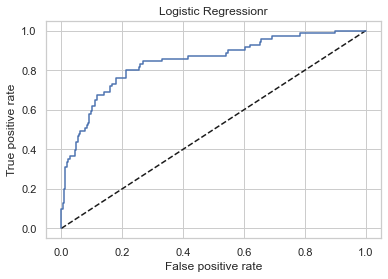

0.6671678720974495

In [52]:
y_pred_prob = LR.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regressionr')
plt.show()
auc_score=roc_auc_score(y_test,LR.predict(x_test))
auc_score

## DecisionTree Classifier

In [53]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Mean cross_validation score for DecisionTreeClassifier: ",cross_val_score(dtc,x,y,cv=5,scoring="accuracy").mean())
print("standard deviation incross_validation score for DecisionTreeClassifier: ",cross_val_score(dtc,x,y,cv=5,scoring="accuracy").std())
print(cross_val_score(dtc,x,y,cv=5,scoring="accuracy"))

Accuracy Score: 0.7868480725623582
Mean cross_validation score for DecisionTreeClassifier:  0.7843537414965986
standard deviation incross_validation score for DecisionTreeClassifier:  0.02342744946628919
[0.79591837 0.78231293 0.81972789 0.7414966  0.78231293]


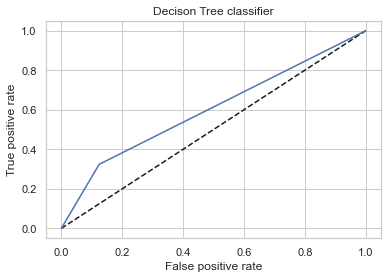

0.5998096688237533

In [54]:
#Decision Tree Curve

y_pred_prob = dtc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision tree classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decison Tree classifier')
plt.show()
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
auc_score

## SVC

In [55]:
svc=SVC(kernel="linear", probability=True)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Mean cross_validation score for DecisionTreeClassifier: ",cross_val_score(svc,x,y,cv=5,scoring="accuracy").mean())
print("standard deviation incross_validation score for DecisionTreeClassifier: ",cross_val_score(svc,x,y,cv=5,scoring="accuracy").std())
print(cross_val_score(svc,x,y,cv=5,scoring="accuracy"))

Accuracy Score: 0.8820861678004536
Mean cross_validation score for DecisionTreeClassifier:  0.8891156462585034
standard deviation incross_validation score for DecisionTreeClassifier:  0.007636035483212134
[0.89455782 0.88435374 0.88095238 0.88435374 0.90136054]


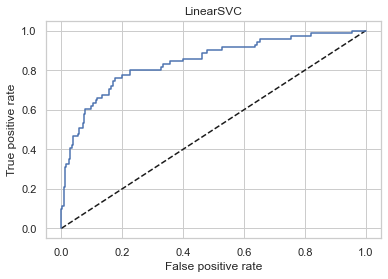

0.6907118385991625

In [56]:
#SVC CURVE

probas_ = svc.predict_proba(x_test)[:, 1]
fpr,tpr,thresholds=roc_curve(y_test,probas_)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LinearSVC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('LinearSVC')
plt.show()
auc_score=roc_auc_score(y_test,svc.predict(x_test))
auc_score

## RandomForestClassifier

In [57]:
rfc=RandomForestClassifier(n_estimators=110)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Mean cross_validation score for DecisionTreeClassifier: ",cross_val_score(rfc,x,y,cv=5,scoring="accuracy").mean())
print("standard deviation incross_validation score for DecisionTreeClassifier: ",cross_val_score(rfc,x,y,cv=5,scoring="accuracy").std())
print(cross_val_score(rfc,x,y,cv=5,scoring="accuracy"))

Accuracy Score: 0.8571428571428571
Mean cross_validation score for DecisionTreeClassifier:  0.8585034013605443
standard deviation incross_validation score for DecisionTreeClassifier:  0.005691564806354222
[0.85034014 0.8537415  0.86734694 0.8537415  0.86054422]


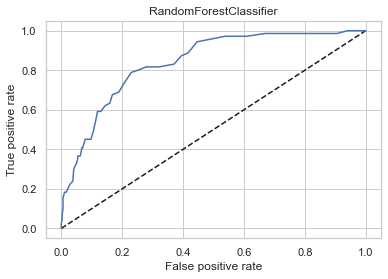

0.567719832508565

In [58]:
#RandomForestClassifier CURVE

y_pred_prob = rfc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()
auc_score=roc_auc_score(y_test,rfc.predict(x_test))
auc_score

## KNeighborsClassifier

In [59]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Mean cross_validation score for DecisionTreeClassifier: ",cross_val_score(knn,x,y,cv=5,scoring="accuracy").mean())
print("standard deviation incross_validation score for DecisionTreeClassifier: ",cross_val_score(knn,x,y,cv=5,scoring="accuracy").std())
print(cross_val_score(knn,x,y,cv=5,scoring="accuracy"))

Accuracy Score: 0.8412698412698413
Mean cross_validation score for DecisionTreeClassifier:  0.8496598639455784
standard deviation incross_validation score for DecisionTreeClassifier:  0.003966633942071588
[0.84693878 0.8537415  0.85034014 0.8537415  0.84353741]


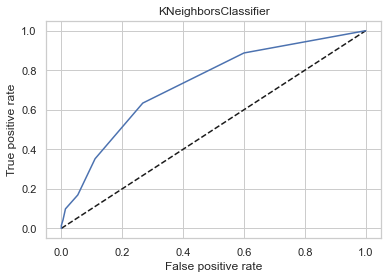

0.5184240578606776

In [60]:
#KNeighborsClassifier CURVE

y_pred_prob = knn.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier')
plt.show()
auc_score=roc_auc_score(y_test,knn.predict(x_test))
auc_score

### Observation:

Here ,the aucroc score of SVC is high among the all, so we can use this model for the prediction.

## Hyperparameter Tuning

In [61]:
from sklearn.model_selection import GridSearchCV
parameters=[{"kernel":["linear", "poly", "rbf"],
            "C":[0.001,0.01,0.1,1,10],
             "gamma":["scale","auto"],
              'class_weight':['balanced', None]
            }]


clf = GridSearchCV(svc, parameters, cv=5, n_jobs=-1)
# Fit it to the data
clf.fit(x_train,y_train)

# Print the tuned parameters and score
print("Tuned Svm Parameters: {}".format(clf.best_params_))
print("Best score is {}".format(clf.best_score_))

Tuned Svm Parameters: {'C': 0.1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}
Best score is 0.8785555292446128


## Final modelling and evaluating using Best Parameteres

In [62]:
from sklearn.metrics import f1_score

svc=SVC(kernel="linear",C=0.1,class_weight= None, gamma= 'scale',probability=True)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))

Confusion matrix 
 [[364   6]
 [ 47  24]]
f1 score is :  0.4752475247524753
classification report 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       370
           1       0.80      0.34      0.48        71

    accuracy                           0.88       441
   macro avg       0.84      0.66      0.70       441
weighted avg       0.87      0.88      0.86       441

AUC ROC Score:  0.6609059763989341


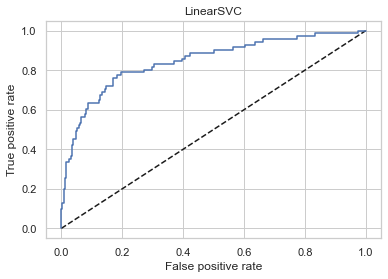

In [63]:
#SVC
probas_ = svc.predict_proba(x_test)[:, 1]
fpr,tpr,thresholds=roc_curve(y_test,probas_)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LinearSVC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('LinearSVC')
plt.show()


The final model has an AUC_ROC score of 0.66.

## Saving the model

In [64]:
model=joblib.dump(svc,'HRSVC.obj')

### Conclusion :

In [65]:
loaded_model= joblib.load('HRSVC.obj')
result=loaded_model.score(x_test,y_test)
print(result)

0.8798185941043084


In [66]:
conclusion= pd.DataFrame([svc.predict(x_test)[:]],index=['Predicted','Original'])

In [67]:
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440
Predicted,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Original,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
